In [3]:
from pyspark.sql import SparkSession 
spark = SparkSession.builder.getOrCreate() 

In [4]:
fatalityData = spark.read.format("csv").option("header", "true").load('Fatal_Collisions.csv') 
fatalityData.createOrReplaceTempView("fatalities") 

In [5]:
spark.sql("SELECT INVAGE AS Speed, COUNT(*) AS RecordCount FROM fatalities GROUP BY INVAGE ORDER BY RecordCount DESC LIMIT 1").show()

+--------+-----------+
|   Speed|RecordCount|
+--------+-----------+
|20 to 24|         73|
+--------+-----------+



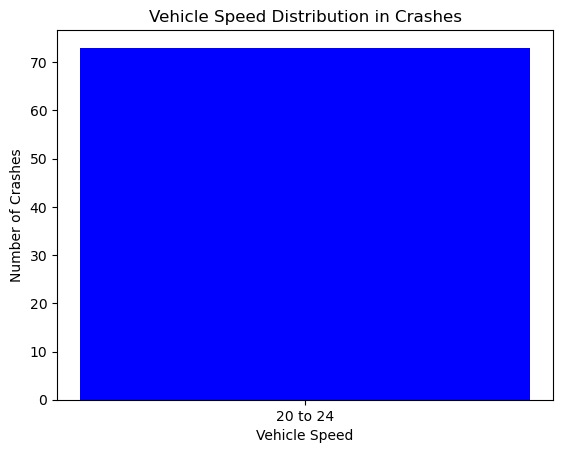

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'result' is the output of your Spark SQL query
result = spark.sql("SELECT INVAGE AS Speed, COUNT(*) AS RecordCount FROM fatalities GROUP BY INVAGE ORDER BY RecordCount DESC LIMIT 1").toPandas()

# Plotting the bar graph
plt.bar(result['Speed'], result['RecordCount'], color='blue')
plt.xlabel('Vehicle Speed')
plt.ylabel('Number of Crashes')
plt.title('Vehicle Speed Distribution in Crashes')
plt.show()


In [6]:
spark.sql("SELECT DISTRICT AS DISTRICT, COUNT(*) AS Fatalities FROM fatalities GROUP BY DISTRICT ORDER BY Fatalities DESC LIMIT 1").show()

+-----------+----------+
|   DISTRICT|Fatalities|
+-----------+----------+
|Scarborough|       267|
+-----------+----------+



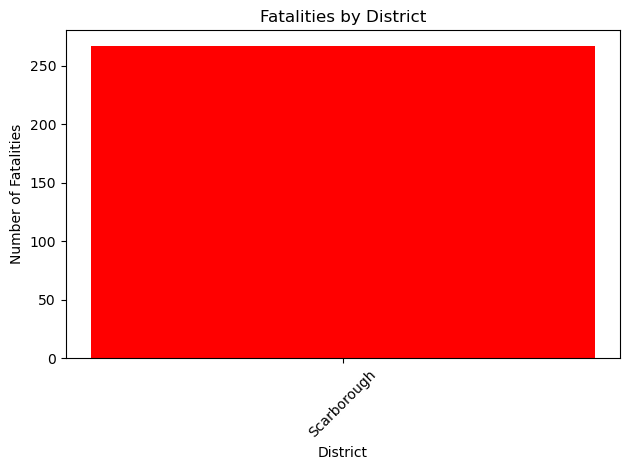

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'result' is the output of your Spark SQL query
result = spark.sql("SELECT DISTRICT AS DISTRICT, COUNT(*) AS Fatalities FROM fatalities GROUP BY DISTRICT ORDER BY Fatalities DESC LIMIT 1").toPandas()

# Plotting the bar graph
plt.bar(result['DISTRICT'], result['Fatalities'], color='red')
plt.xlabel('District')
plt.ylabel('Number of Fatalities')
plt.title('Fatalities by District')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



In [7]:
spark.sql("SELECT STREET1 as Street_Name, count(*) AS Fatalities FROM fatalities GROUP BY Street_Name ORDER BY Fatalities DESC LIMIT 10").show()

+-----------------+----------+
|      Street_Name|Fatalities|
+-----------------+----------+
|   LAWRENCE AVE E|        23|
|      FINCH AVE W|        22|
|   EGLINTON AVE E|        21|
|    STEELES AVE W|        20|
|LAKE SHORE BLVD W|        19|
|       WARDEN AVE|        18|
|          JANE ST|        18|
|      DUNDAS ST W|        17|
|   SHEPPARD AVE E|        17|
|    STEELES AVE E|        16|
+-----------------+----------+



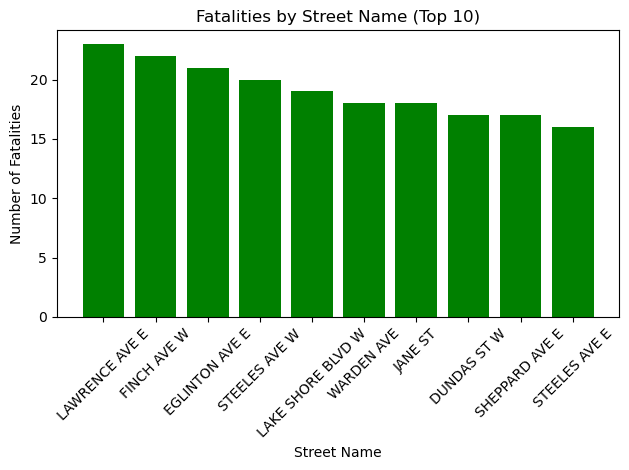

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'result' is the output of your Spark SQL query
result = spark.sql("SELECT STREET1 as Street_Name, count(*) AS Fatalities FROM fatalities GROUP BY Street_Name ORDER BY Fatalities DESC LIMIT 10").toPandas()

# Plotting the bar graph
plt.bar(result['Street_Name'], result['Fatalities'], color='green')
plt.xlabel('Street Name')
plt.ylabel('Number of Fatalities')
plt.title('Fatalities by Street Name (Top 10)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [8]:
spark.sql("SELECT LIGHT as Light_Conditions, count(*) AS Fatalities FROM fatalities GROUP BY Light_Conditions ORDER BY Fatalities DESC").show()

+--------------------+----------+
|    Light_Conditions|Fatalities|
+--------------------+----------+
|            Daylight|       466|
|                Dark|       218|
|    Dark, artificial|       197|
|                Dusk|        14|
|    Dusk, artificial|        11|
|    Dawn, artificial|        10|
|Daylight, artificial|         7|
|                Dawn|         6|
|               Other|         2|
+--------------------+----------+



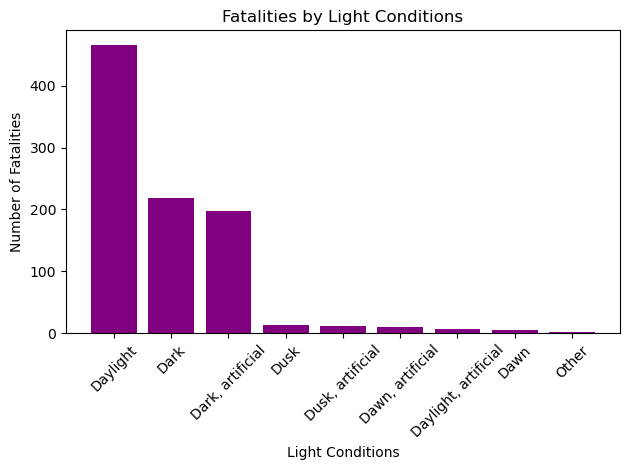

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'result' is the output of your Spark SQL query
result = spark.sql("SELECT LIGHT as Light_Conditions, count(*) AS Fatalities FROM fatalities GROUP BY Light_Conditions ORDER BY Fatalities DESC").toPandas()

# Plotting the bar graph
plt.bar(result['Light_Conditions'], result['Fatalities'], color='purple')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Fatalities')
plt.title('Fatalities by Light Conditions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [9]:
spark.sql("SELECT RDSFCOND AS Road_Conditions, count(*) AS Fatalities FROM fatalities GROUP BY Road_Conditions ORDER BY Fatalities DESC").show()

+---------------+----------+
|Road_Conditions|Fatalities|
+---------------+----------+
|            Dry|       729|
|            Wet|       157|
|          Other|        21|
|           NULL|        11|
|          Slush|         4|
|     Loose Snow|         4|
|    Packed Snow|         4|
|            Ice|         1|
+---------------+----------+



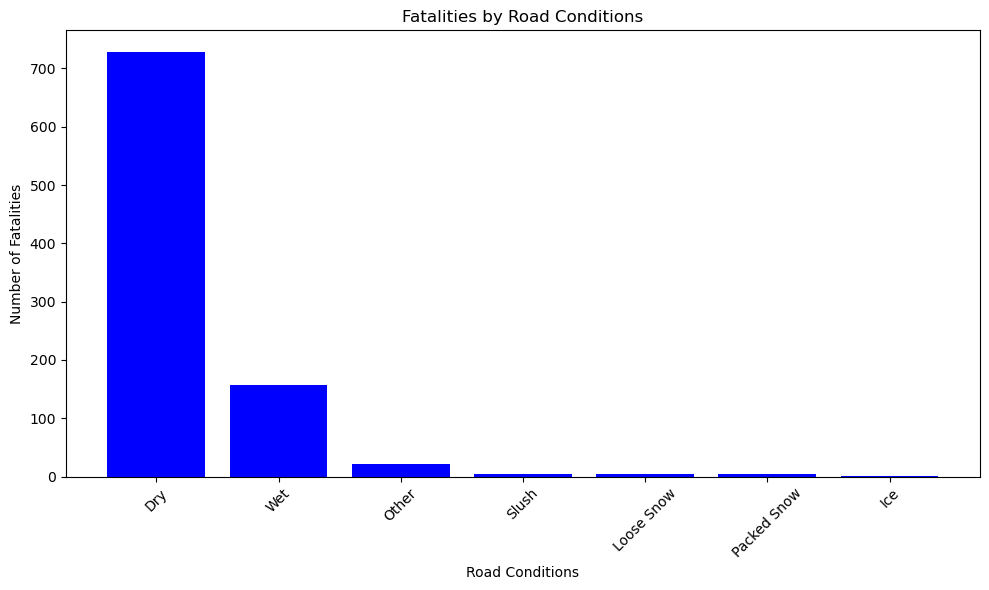

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'result' is the output of your Spark SQL query
result = spark.sql("SELECT RDSFCOND AS Road_Conditions, count(*) AS Fatalities FROM fatalities GROUP BY Road_Conditions ORDER BY Fatalities DESC").toPandas()

# Removing rows with NULL values
result = result.dropna()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(result['Road_Conditions'], result['Fatalities'], color='blue')
plt.xlabel('Road Conditions')
plt.ylabel('Number of Fatalities')
plt.title('Fatalities by Road Conditions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



In [10]:
spark.sql("SELECT YEAR as Year, count(*) AS Fatalities FROM fatalities GROUP BY Year ORDER BY Year DESC LIMIT 1").show()

+----+----------+
|Year|Fatalities|
+----+----------+
|2022|        50|
+----+----------+



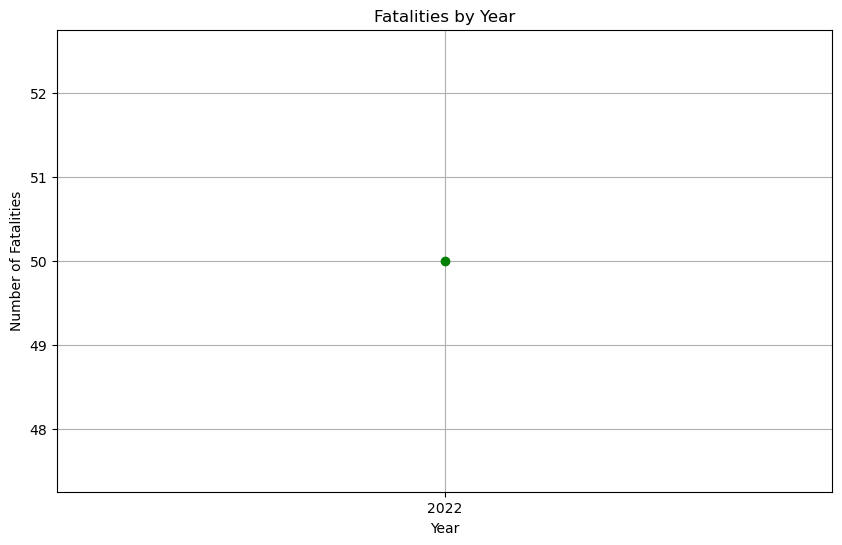

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'result' is the output of your Spark SQL query
result = spark.sql("SELECT YEAR as Year, count(*) AS Fatalities FROM fatalities GROUP BY Year ORDER BY Year DESC LIMIT 1").toPandas()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(result['Year'], result['Fatalities'], marker='o', color='green', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.title('Fatalities by Year')
plt.grid(True)
plt.show()


In [11]:
spark.sql("SELECT TRAFFCTL AS Traffic_Control, count(*) AS Fatalities FROM fatalities GROUP BY Traffic_Control ORDER BY Fatalities DESC").show()

+--------------------+----------+
|     Traffic_Control|Fatalities|
+--------------------+----------+
|          No Control|       527|
|      Traffic Signal|       331|
|           Stop Sign|        59|
|Pedestrian Crossover|        11|
|                NULL|         2|
|        Traffic Gate|         1|
+--------------------+----------+



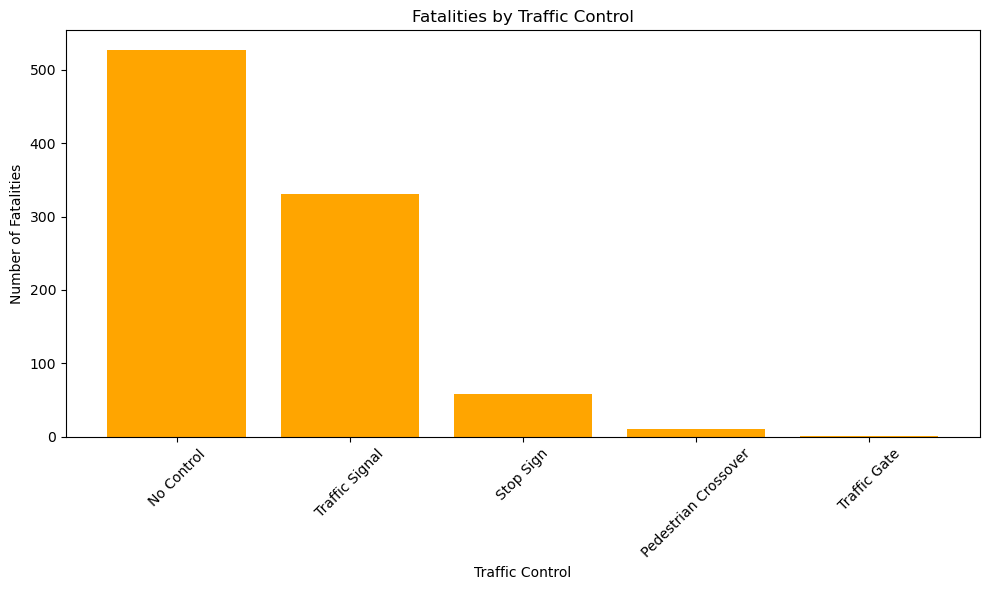

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'result' is the output of your Spark SQL query
result = spark.sql("SELECT TRAFFCTL AS Traffic_Control, count(*) AS Fatalities FROM fatalities GROUP BY TRAFFCTL ORDER BY Fatalities DESC").toPandas()

# Remove rows with None values
result = result.dropna()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(result['Traffic_Control'], result['Fatalities'], color='orange')
plt.xlabel('Traffic Control')
plt.ylabel('Number of Fatalities')
plt.title('Fatalities by Traffic Control')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [12]:
spark.sql("SELECT SPEEDING AS Speeding, count(*) AS Fatalities FROM fatalities GROUP BY Speeding ORDER BY Fatalities DESC").show()

+--------+----------+
|Speeding|Fatalities|
+--------+----------+
|    NULL|       744|
|     Yes|       187|
+--------+----------+



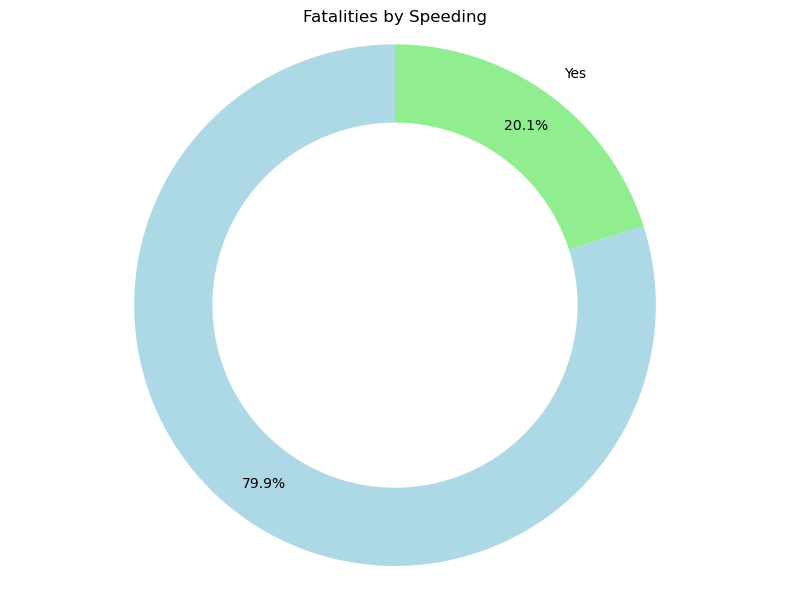

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'result' is the output of your Spark SQL query
result = spark.sql("SELECT SPEEDING AS Speeding, count(*) AS Fatalities FROM fatalities GROUP BY Speeding ORDER BY Fatalities DESC").toPandas()

# Plotting the donut chart
plt.figure(figsize=(8, 6))

# Colors for the pie chart
colors = ['lightblue', 'lightgreen']

# Plotting the pie chart
plt.pie(result['Fatalities'], labels=result['Speeding'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Draw a circle to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Fatalities by Speeding')
plt.tight_layout()
plt.show()


In [13]:
spark.sql("SELECT PEDACT AS Pedestrian_Action_Description, count(*) AS Fatalities FROM fatalities WHERE PEDACT='Crossing with right of way' GROUP BY Pedestrian_Action_Description").show()

+-----------------------------+----------+
|Pedestrian_Action_Description|Fatalities|
+-----------------------------+----------+
|         Crossing with rig...|       128|
+-----------------------------+----------+



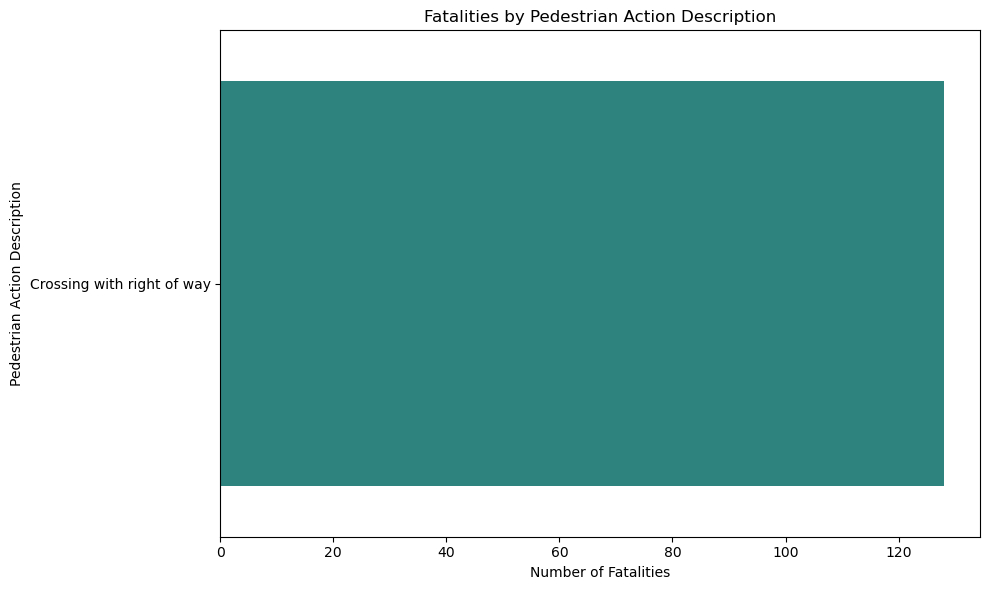

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'result' is the output of your Spark SQL query
result = spark.sql("SELECT PEDACT AS Pedestrian_Action_Description, count(*) AS Fatalities FROM fatalities WHERE PEDACT='Crossing with right of way' GROUP BY Pedestrian_Action_Description").toPandas()

# Plotting the horizontal bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Fatalities', y='Pedestrian_Action_Description', data=result, palette='viridis')
plt.xlabel('Number of Fatalities')
plt.ylabel('Pedestrian Action Description')
plt.title('Fatalities by Pedestrian Action Description')
plt.tight_layout()
plt.show()


In [14]:
spark.sql("SELECT ALCOHOL AS Alcohol, count(*) AS Fatalities FROM fatalities WHERE ALCOHOL='Yes' GROUP BY Alcohol").show()

+-------+----------+
|Alcohol|Fatalities|
+-------+----------+
|    Yes|        44|
+-------+----------+



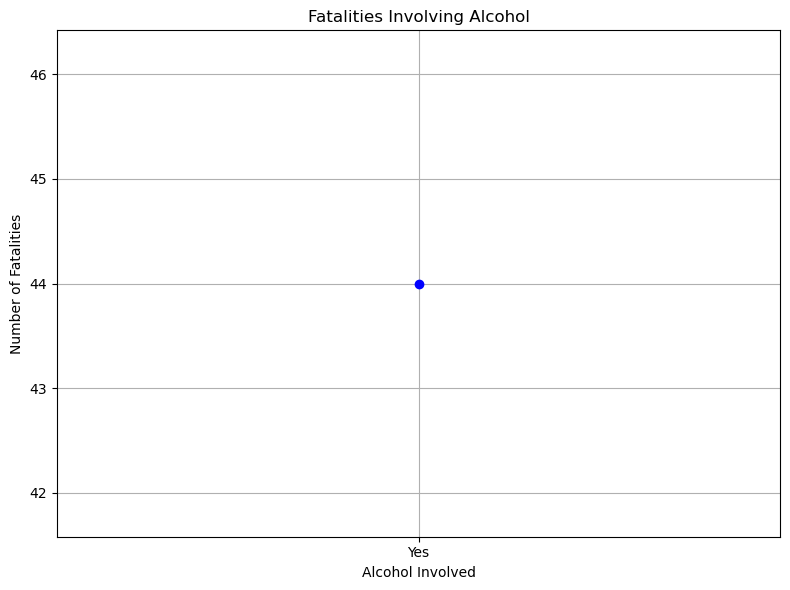

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'result' is the output of your Spark SQL query
result = spark.sql("SELECT ALCOHOL AS Alcohol, count(*) AS Fatalities FROM fatalities WHERE ALCOHOL='Yes' GROUP BY Alcohol").toPandas()

# Plotting the line chart
plt.figure(figsize=(8, 6))
plt.plot(result['Alcohol'], result['Fatalities'], marker='o', color='blue', linestyle='-')
plt.xlabel('Alcohol Involved')
plt.ylabel('Number of Fatalities')
plt.title('Fatalities Involving Alcohol')
plt.grid(True)
plt.tight_layout()
plt.show()
